In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.datasets import make_regression, load_boston
from sklearn.model_selection import cross_val_score,cross_val_predict
from statsmodels.api import OLS
from scipy.stats import pearsonr,spearmanr

## One student's homework (slightly modified)

In [2]:
df = pd.read_csv('data/flags.csv')

In [3]:
df.head()

,name,landmass,zone,area,pop_millions,language,religion,bars,stripes,colors,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [4]:
list(df)

['name',
 'landmass',
 'zone',
 'area',
 'pop_millions',
 'language',
 'religion',
 'bars',
 'stripes',
 'colors',
 'red',
 'green',
 'blue',
 'gold',
 'white',
 'black',
 'orange',
 'main_color',
 'circles',
 'crosses',
 'saltires',
 'quarters',
 'sunstars',
 'crescent',
 'triangle',
 'icon',
 'animate',
 'text',
 'topleft',
 'botright']

## Data filtering

In [5]:
df=df.drop(df['green']) 
#i don't know why but the green column was causing 
# issues 
#string could not convert to float?

## What kinds of data are there?

In [6]:
df.dtypes

name            object
landmass         int64
zone             int64
area             int64
pop_millions     int64
language         int64
religion         int64
bars             int64
stripes          int64
colors           int64
red              int64
green            int64
blue             int64
gold             int64
white            int64
black            int64
orange           int64
main_color      object
circles          int64
crosses          int64
saltires         int64
quarters         int64
sunstars         int64
crescent         int64
triangle         int64
icon             int64
animate          int64
text             int64
topleft         object
botright        object
dtype: object

## What are the predictors (X) and the target (y)?

In [7]:
y = df['landmass']
X = df[[ 'language', 'religion', 'blue', 'red','stripes']]

In [8]:
rfr = RandomForestRegressor(n_estimators=25)
lm = LinearRegression()

In [9]:
def prediction_quality_regression(est,X,y):
    """Computes the Pearson correlation between predicted and observed values"""
    predicted = cross_val_predict(est,X.values,y.values).squeeze()
    actual = y.values.squeeze()
    r,p = pearsonr(predicted,actual)
    se = (1-r**2)/np.sqrt(len(predicted)-2) # formula for standard error of correlation coefficient 
    return r,se

## Linear Model Prediction Quality

In [10]:
print("R = %.3f +/- %.3f" % prediction_quality_regression(lm,X,y))

R = 0.468 +/- 0.057


## Random Forest Prediction Quality

In [11]:
print("R = %.3f +/- %.3f" % prediction_quality_regression(rfr,X,y))

R = 0.563 +/- 0.050


## Which features were important?

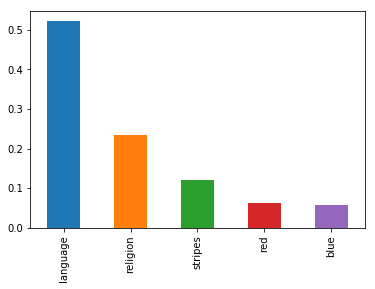

In [12]:
rfr.fit(X.values,y.values)
importances = pd.Series(rfr.feature_importances_,
                        index=list(X))
importances.sort_values(ascending=False).plot.bar();

## Was this a regression problem?

In [13]:
df['landmass'].head(10)

2     4
3     6
4     3
5     4
6     1
7     1
8     2
9     2
10    6
11    3
Name: landmass, dtype: int64

In [14]:
rfr.predict(X.values)[:10]

array([4.23809524, 3.84197853, 3.        , 4.        , 1.13      ,
       1.47158395, 1.38014286, 1.38014286, 3.84197853, 3.28      ])

## No!  This was a classification problem.

In [15]:
rfc = RandomForestClassifier(n_estimators=25)

In [16]:
def prediction_quality_classification(est,X,y):
    """Computes the Pearson correlation between predicted and observed values"""
    predicted = cross_val_predict(est,X.values,y.values).squeeze()
    actual = y.values.squeeze()
    return (predicted==actual).mean()*100

In [17]:
print("%.1f%% of countries' continents correctly guessed" % prediction_quality_classification(rfc,X,y))

60.4% of countries' continents correctly guessed


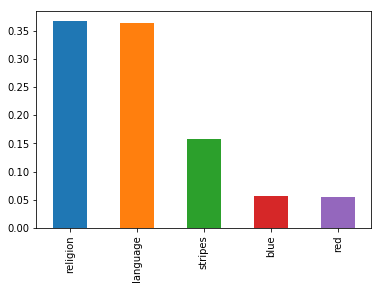

In [18]:
rfc.fit(X.values,y.values)
importances = pd.Series(rfc.feature_importances_,
                        index=list(X))
importances.sort_values(ascending=False).plot.bar();